# Model comparison on Iris

In [1]:
import numpy as np
from scipy import sparse
import pandas as pd
from preamble import *
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X, y = cancer.data, cancer.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train Shape: {}".format(X_train.shape))
print("y_train Shape: {}".format(y_train.shape))

X_train Shape: (426, 30)
y_train Shape: (426,)


In [5]:
print(cancer.target[:10])

[0 0 0 0 0 0 0 0 0 0]


In [6]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

## Starting with Neural Network

In [7]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

In [8]:
print("Accuracy on training data: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training data: 0.955
Accuracy on test data: 0.958


### Updating alpha is a not a win in every case

In [9]:
mlp = MLPClassifier(solver='lbfgs', 
                    random_state=0,
                    alpha=10,
                    hidden_layer_sizes=[100,100]).fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training data: 0.939
Accuracy on test data: 0.937


### But scaling the data beats it

In [10]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000,
                    alpha=0.564,
                    random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training data: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training data: 0.988
Accuracy on test data: 0.986


## K-nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training data: 0.951
Accuracy on test data: 0.930


In [12]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training data: 0.868
Accuracy on test data: 0.838


## Linear Models

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training data: 0.775
Accuracy on test data: 0.732


### Scaling doesn't make much difference on LinearRegression

In [14]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy on training data: 0.775
Accuracy on test data: 0.732


In [15]:
from sklearn.linear_model import Ridge
lr = Ridge().fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy on training data: 0.773
Accuracy on test data: 0.742


In [16]:
lr = Ridge(alpha=10).fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy on training data: 0.763
Accuracy on test data: 0.760


In [17]:
from sklearn.linear_model import Lasso
lr = Lasso().fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Accuracy on training data: 0.000
Accuracy on test data: -0.000
Number of features used: 0


In [18]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.001, max_iter=100000).fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Accuracy on training data: 0.770
Accuracy on test data: 0.761
Number of features used: 21


In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=36).fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training data: 0.974
Accuracy on test data: 0.958


In [20]:
lr = LogisticRegression(C=100).fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy on training data: 0.871
Accuracy on test data: 0.832


In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)
print("Accuracy on training data: {:.3}".format(nb.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training data: 0.937
Accuracy on test data: 0.958


In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)
print("Acccuracy on trainign data: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(tree.score(X_test, y_test)))

Acccuracy on trainign data: 1.000
Accuracy on test data: 0.951


In [23]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print("Acccuracy on trainign data: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(tree.score(X_test, y_test)))

Acccuracy on trainign data: 0.972
Accuracy on test data: 0.951


In [24]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=list(cancer.target_names),
                feature_names=cancer.feature_names, impurity=False, filled=True)

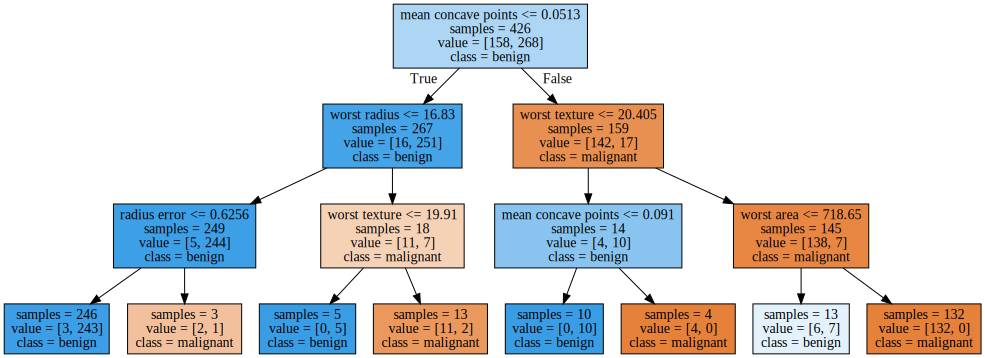

In [25]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

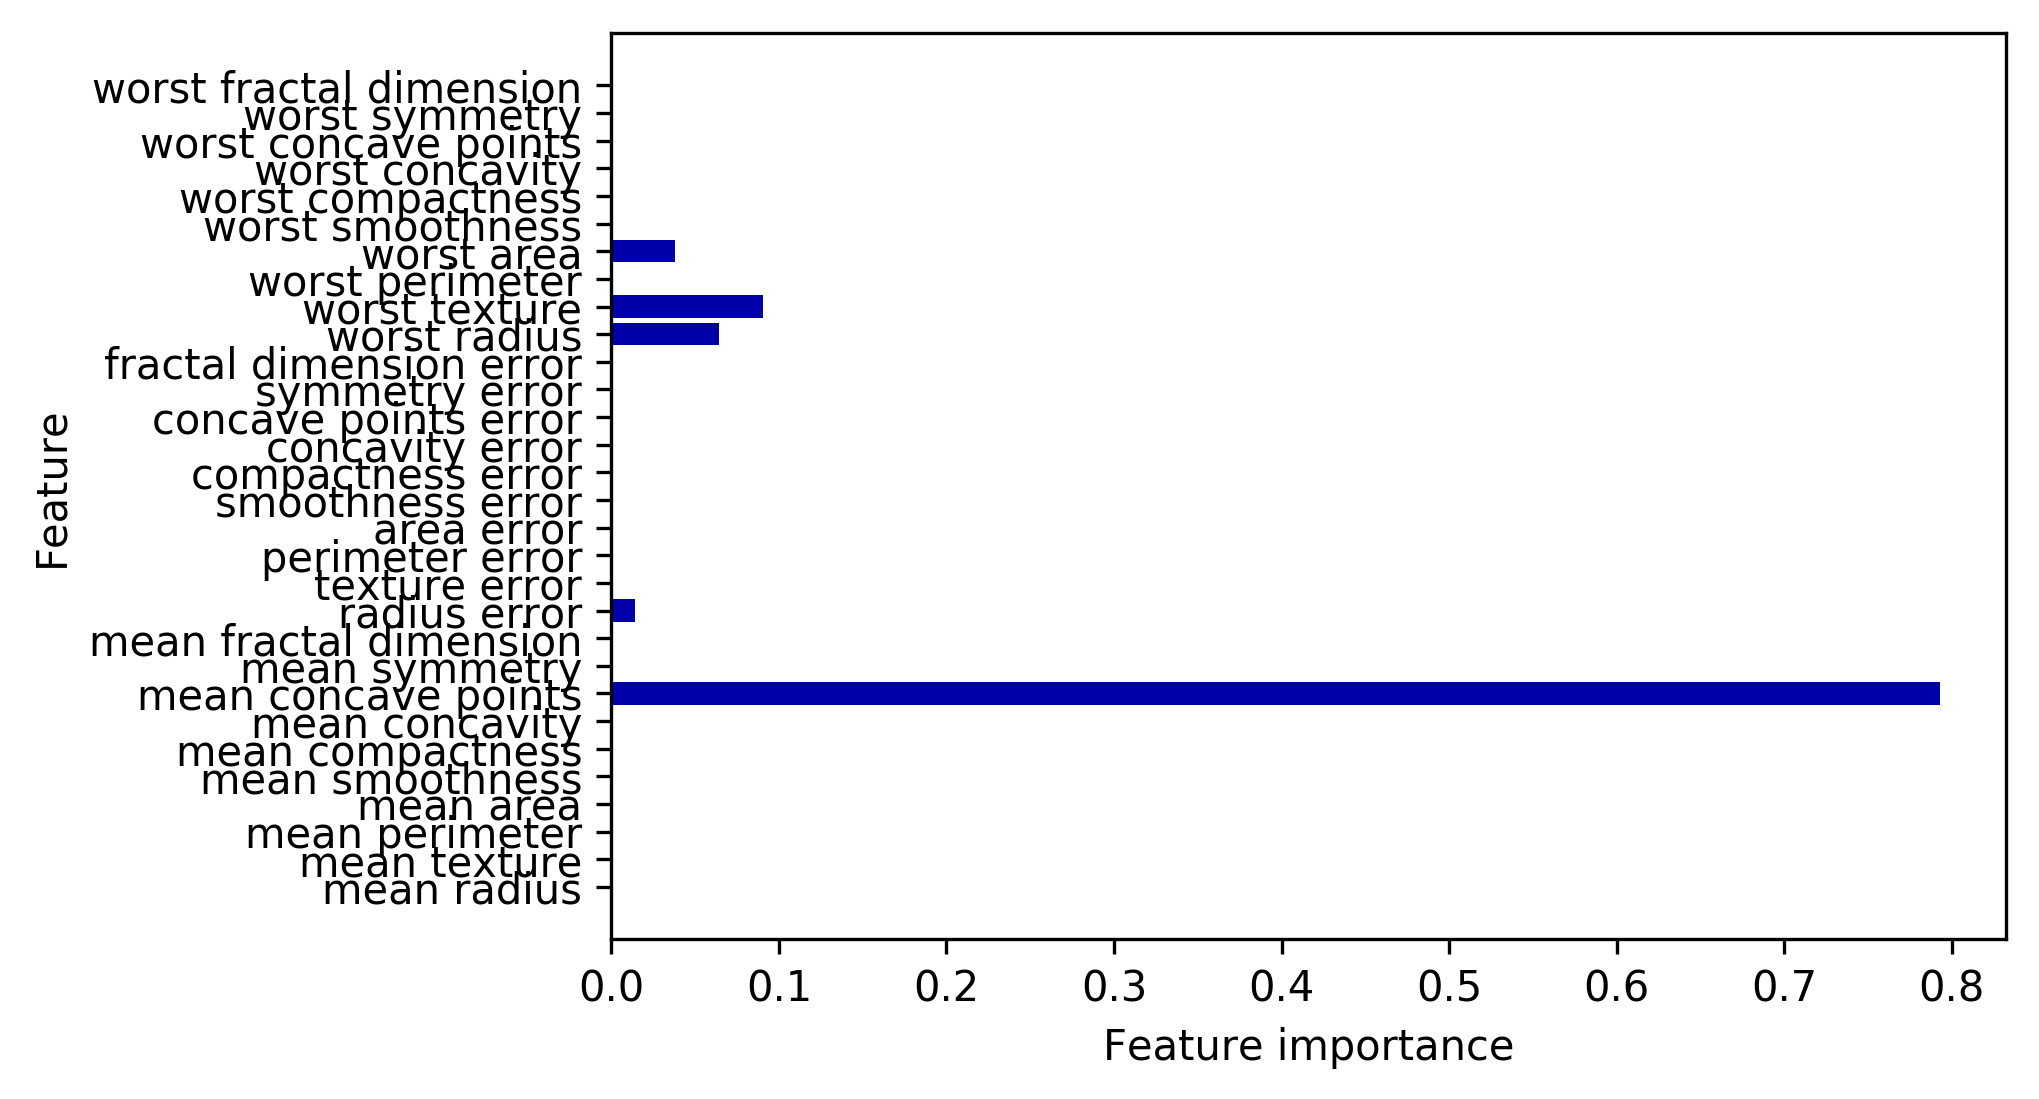

In [26]:
def plot_feature_importances(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree)

In [27]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators=5, max_features=3, random_state=0).fit(X_train, y_train)
print("Acccuracy on trainign data: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(tree.score(X_test, y_test)))

Acccuracy on trainign data: 0.995
Accuracy on test data: 0.972


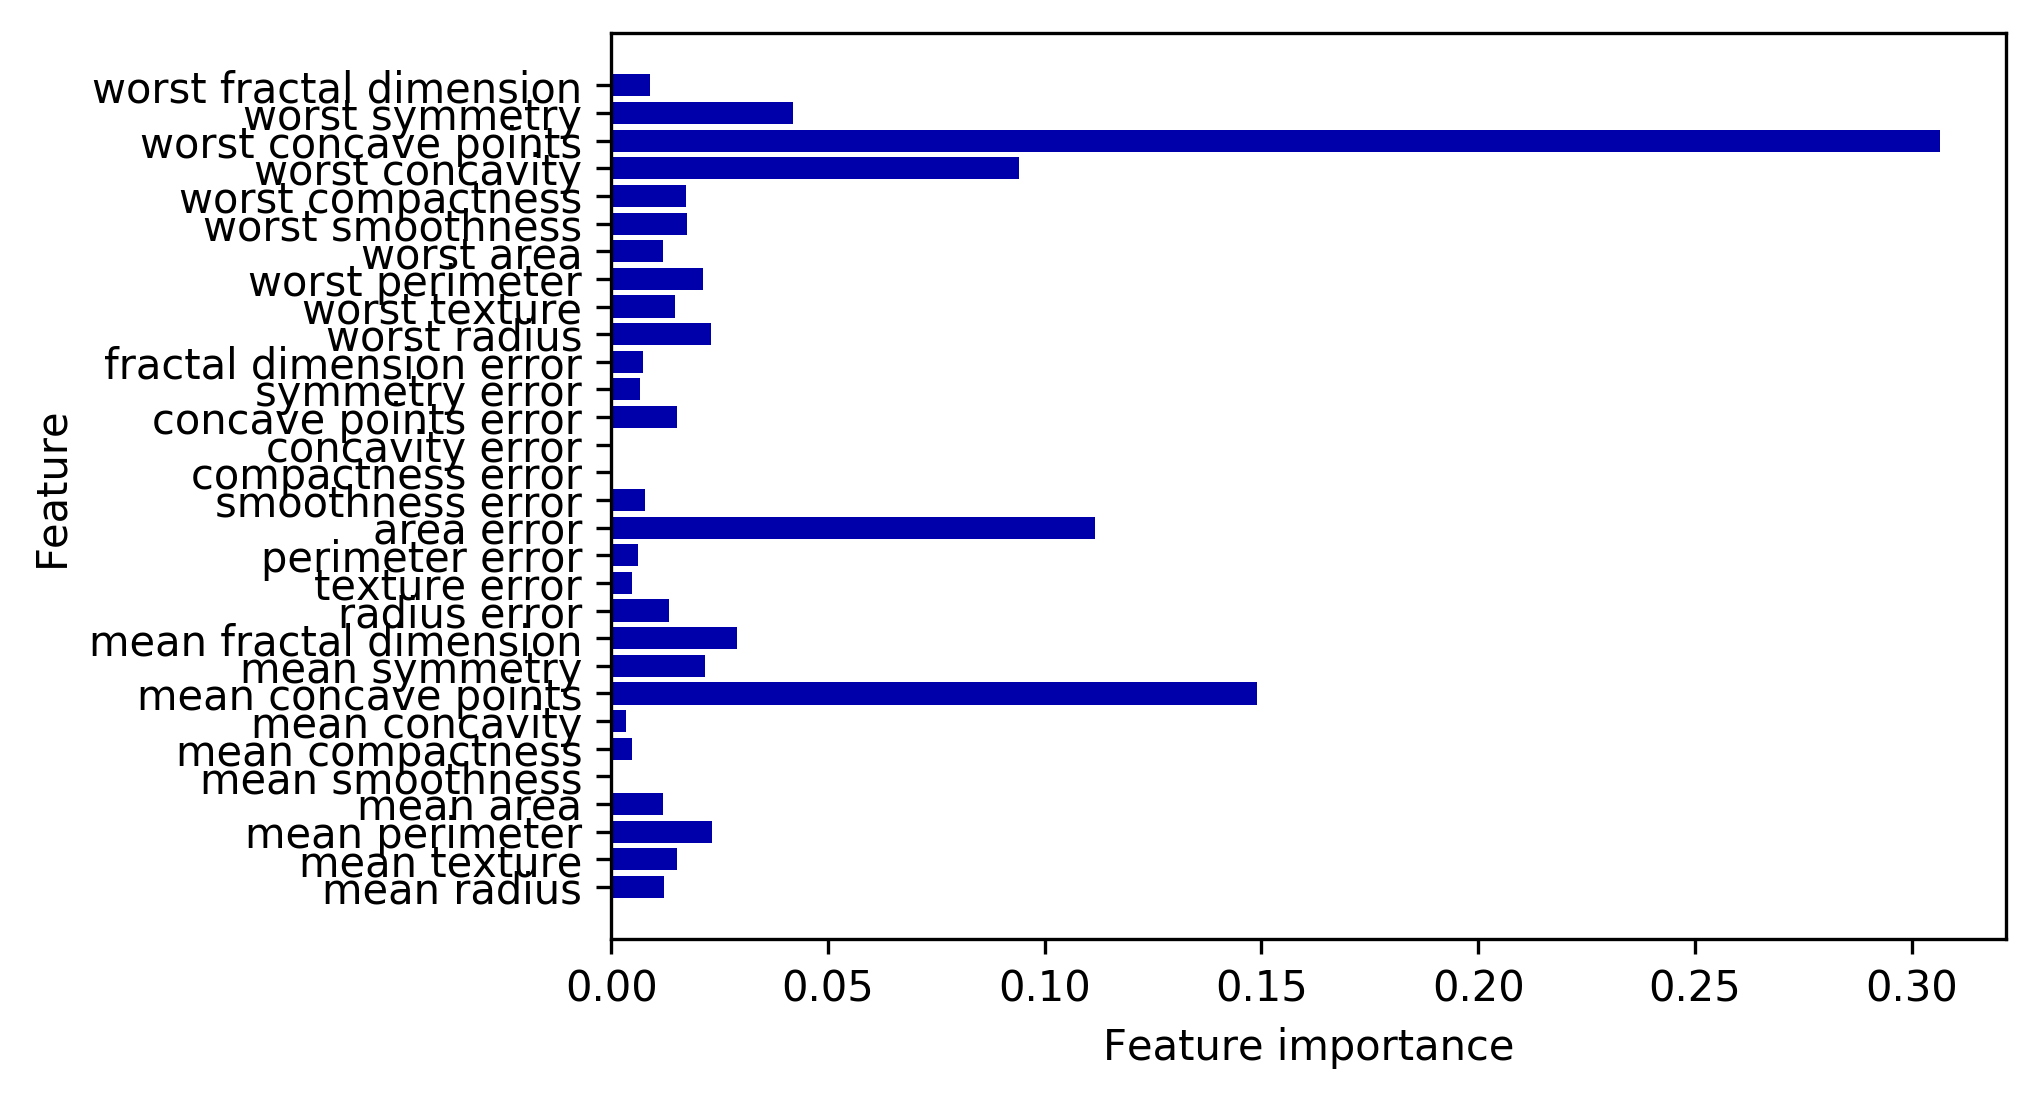

In [28]:
plot_feature_importances(tree)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier().fit(X_train, y_train)
print("Accuray on training data: {:.3}".format(gb.score(X_train, y_train)))
print("Accuray on testing data: {:.3}".format(gb.score(X_test, y_test)))

Accuray on training data: 1.0
Accuray on testing data: 0.958


In [30]:
gb = GradientBoostingClassifier(max_leaf_nodes=30).fit(X_train, y_train)
print("Accuray on training data: {:.3}".format(gb.score(X_train, y_train)))
print("Accuray on testing data: {:.3}".format(gb.score(X_test, y_test)))

Accuray on training data: 1.0
Accuray on testing data: 0.965


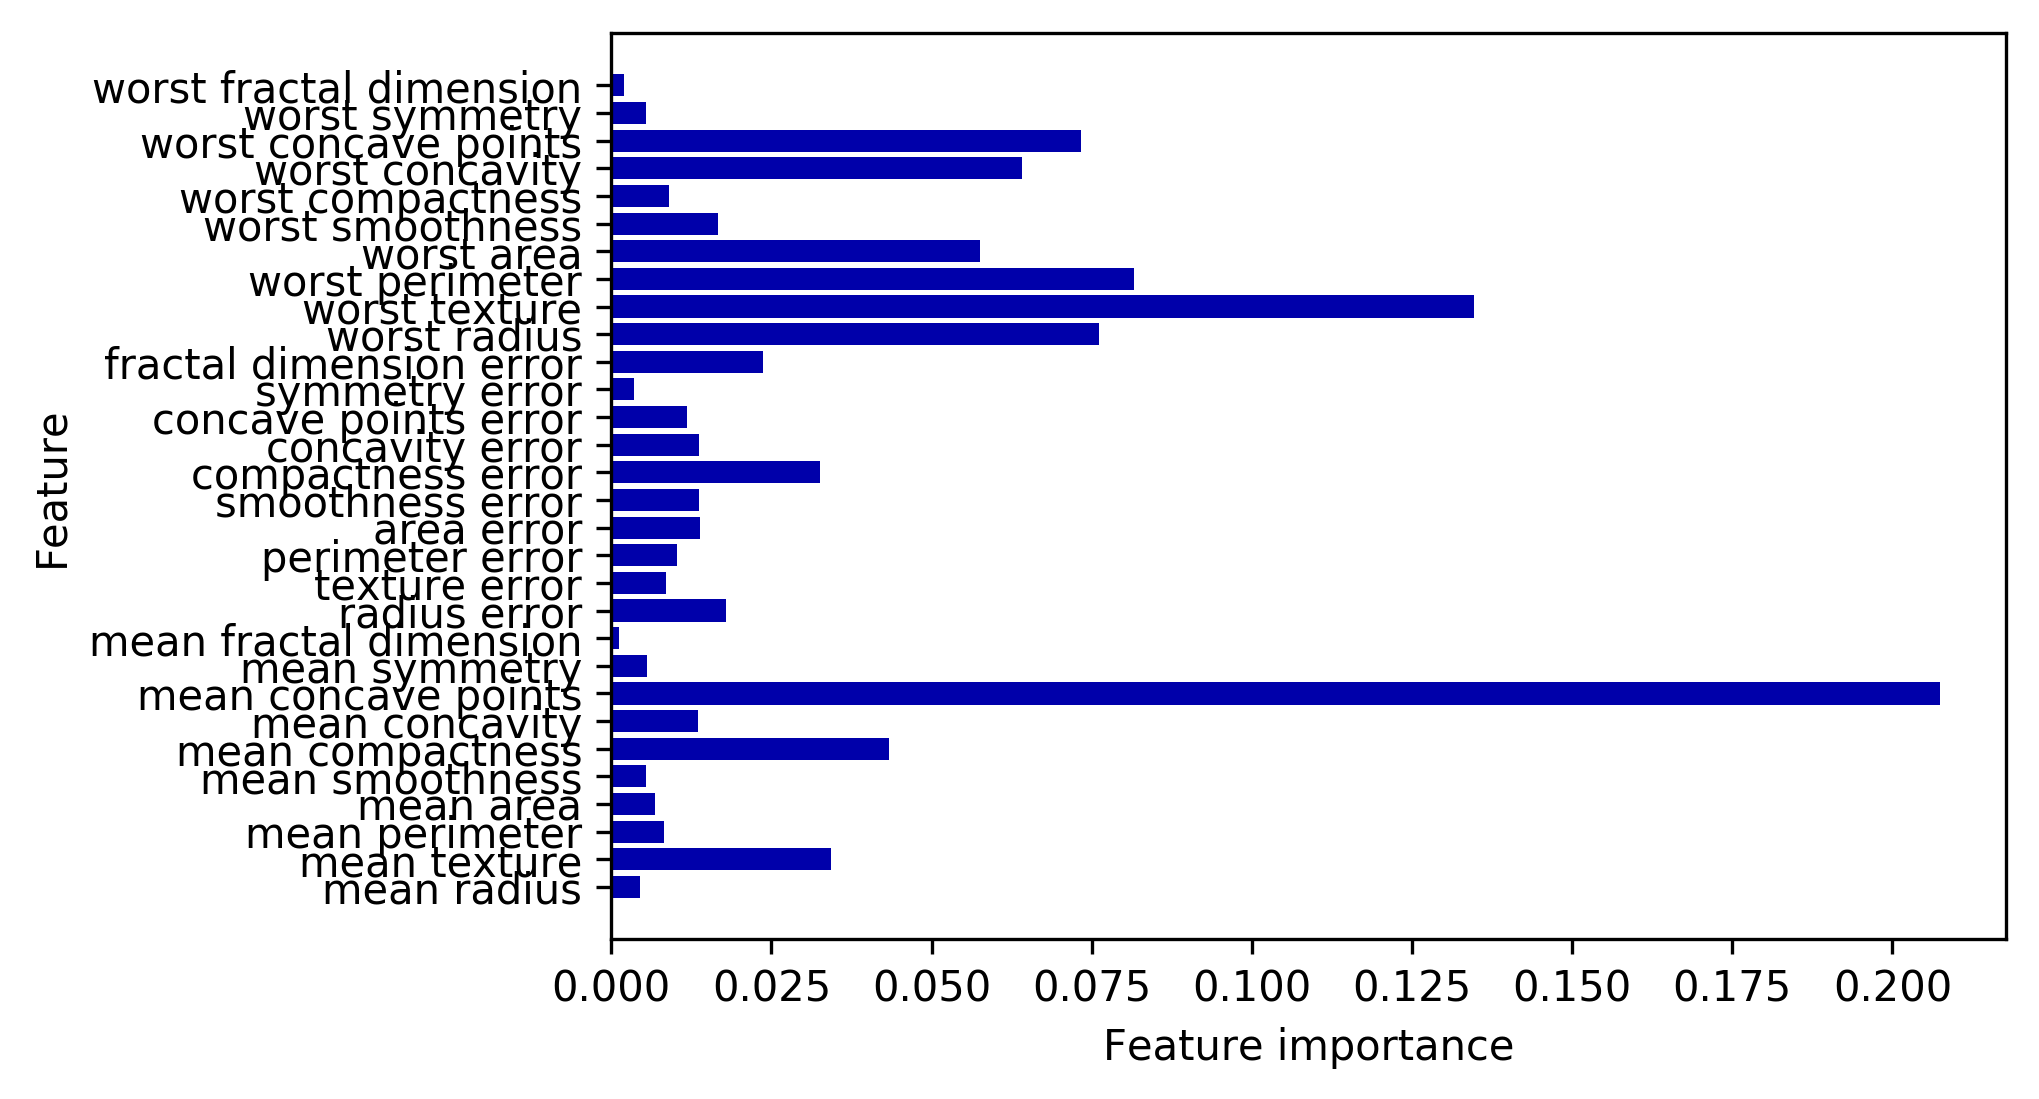

In [31]:
plot_feature_importances(gb)

In [32]:
from sklearn.svm import LinearSVC
svm = LinearSVC().fit(X_train, y_train)
print("Accuray on training data: {:.3}".format(svm.score(X_train, y_train)))
print("Accuray on testing data: {:.3}".format(svm.score(X_test, y_test)))

Accuray on training data: 0.92
Accuray on testing data: 0.958


In [33]:
svm = LinearSVC().fit(X_train_scaled, y_train)
print("Accuray on training data: {:.3}".format(svm.score(X_train_scaled, y_train)))
print("Accuray on testing data: {:.3}".format(svm.score(X_test_scaled, y_test)))

Accuray on training data: 0.988
Accuray on testing data: 0.965


In [34]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)
print("Accuray on training data: {:.3}".format(svm.score(X_train, y_train)))
print("Accuray on testing data: {:.3}".format(svm.score(X_test, y_test)))

Accuray on training data: 1.0
Accuray on testing data: 0.622


In [35]:
svm = SVC(kernel='rbf', C=1000, gamma=0.01).fit(X_train_scaled, y_train)
print("Accuray on training data: {:.3}".format(svm.score(X_train_scaled, y_train)))
print("Accuray on testing data: {:.3}".format(svm.score(X_test_scaled, y_test)))

Accuray on training data: 1.0
Accuray on testing data: 0.937
